<a href="https://colab.research.google.com/github/Papa-Panda/kalman_filter/blob/main/KalmanFilterExample2_NewtonianPhysics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
# kalman filter example
# comes from 卡尔曼滤波示例 - 赵易明的文章 - 知乎
# https://zhuanlan.zhihu.com/p/29191795
# converted to python by chatgpt

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'figure.figsize':(20,4), 'figure.dpi':120})

In [56]:
import numpy as np

# Define the KalmanFilter function (using the version I provided earlier)
def KalmanFilter(s, Q, R):
    # Initialize variables
    N = len(s)
    T = 1
    A = np.array([[1, T], [0, 1]])
    G = np.array([[T**2/2], [T]])
    H = np.array([[1, 0]])
    Xu = np.array([[s[0]], [0]])
    Pu = np.array([[0, 0], [0, 0]])
    I = np.array([[1, 0], [0, 1]])
    T = np.zeros((N, 1))

    # Iterate over the rest of the s values
    for i in range(1, N):
        Xp = np.matmul(A, Xu)
        Pp = np.matmul(A, np.matmul(Pu, A.T)) + Q * np.matmul(G, G.T)
        K = np.matmul(np.matmul(Pp, H.T), np.linalg.inv(np.matmul(H, np.matmul(Pp, H.T)) + R))
        Xu = np.matmul((I - np.matmul(K, H)), Xp) + K * s[i]
        Pu = np.matmul((I - np.matmul(K, H)), Pp)
        T[i] = Xu[0][0]
    
    return T


def TestKalmanFilter(Q):
    # Define the time array
    t = np.arange(-2, 3, 0.001) * 5

    # Generate noise and signal
    n = np.random.randn(len(t))
    s = np.sin(t)

    # Add noise to the signal to create the observed signal
    x = s + n

    # Calculate the measurement error covariance
    R = np.cov(n)


    # Use the KalmanFilter function to filter the observed signal
    y = KalmanFilter(x, Q, R)

    # Calculate the error between the filtered signal and the true signal
    e = s - y

    # Plot the results
    import matplotlib.pyplot as plt

    fig, (ax1, ax2) = plt.subplots(2, 1)

    ax1.plot(x, color=[0.2, 0.5, 0.8], linewidth=2, label='observed')
    ax1.plot(y, color=[1, 0.6, 0], linewidth=2, label='filtered')
    ax1.plot(s, color=[1, 0.9, 0], linewidth=2, label='true value')
    ax1.legend(loc='best')
    ax1.axis('tight')

    ax2.plot(e, color=[0.2, 0.5, 0.8])
    ax2.legend(loc='best')
    ax2.axis('tight')

    plt.show()

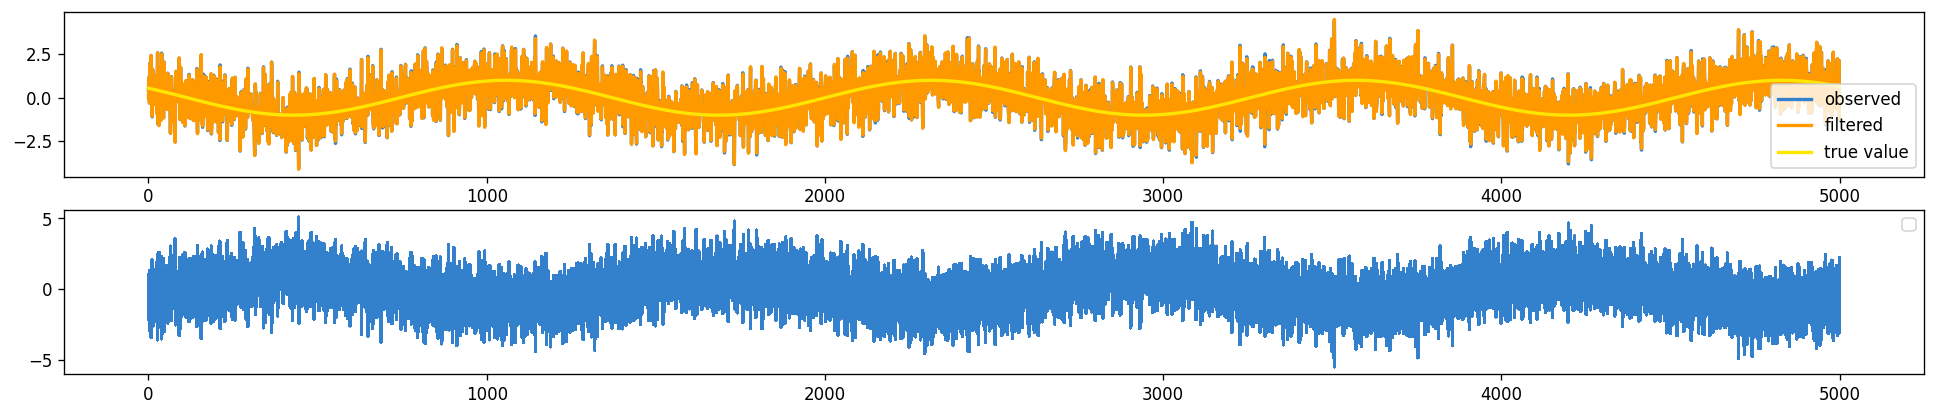

In [57]:
Q = 200
TestKalmanFilter(Q)

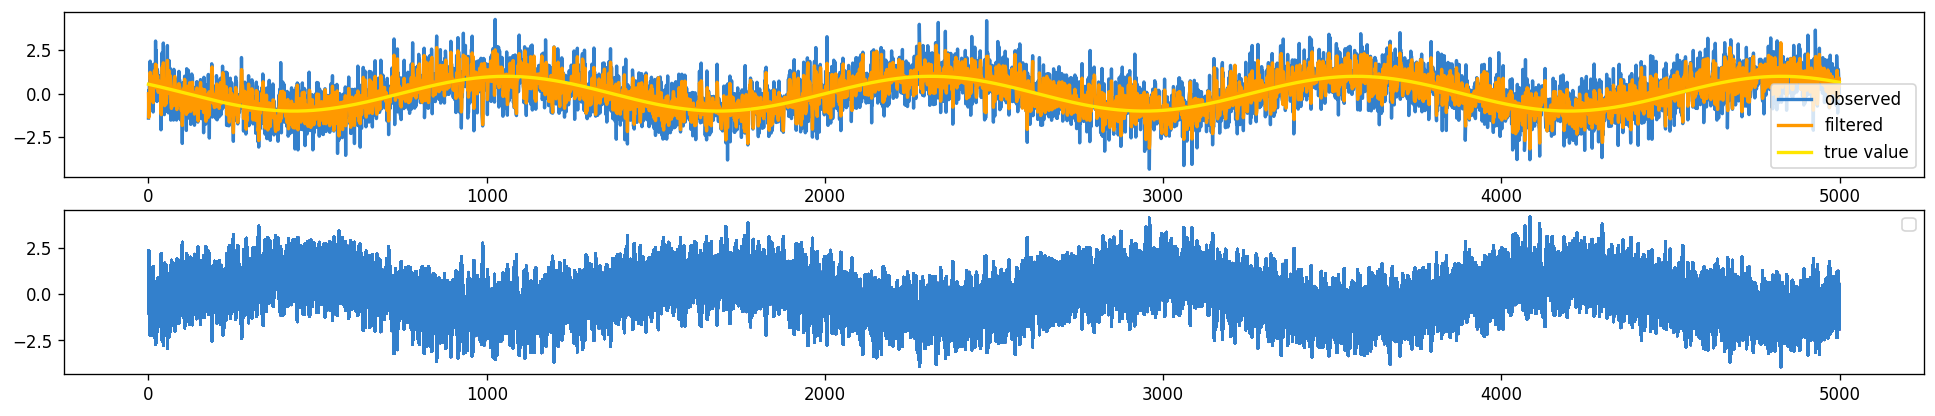

In [47]:
Q = 10**(-1)
TestKalmanFilter(Q)

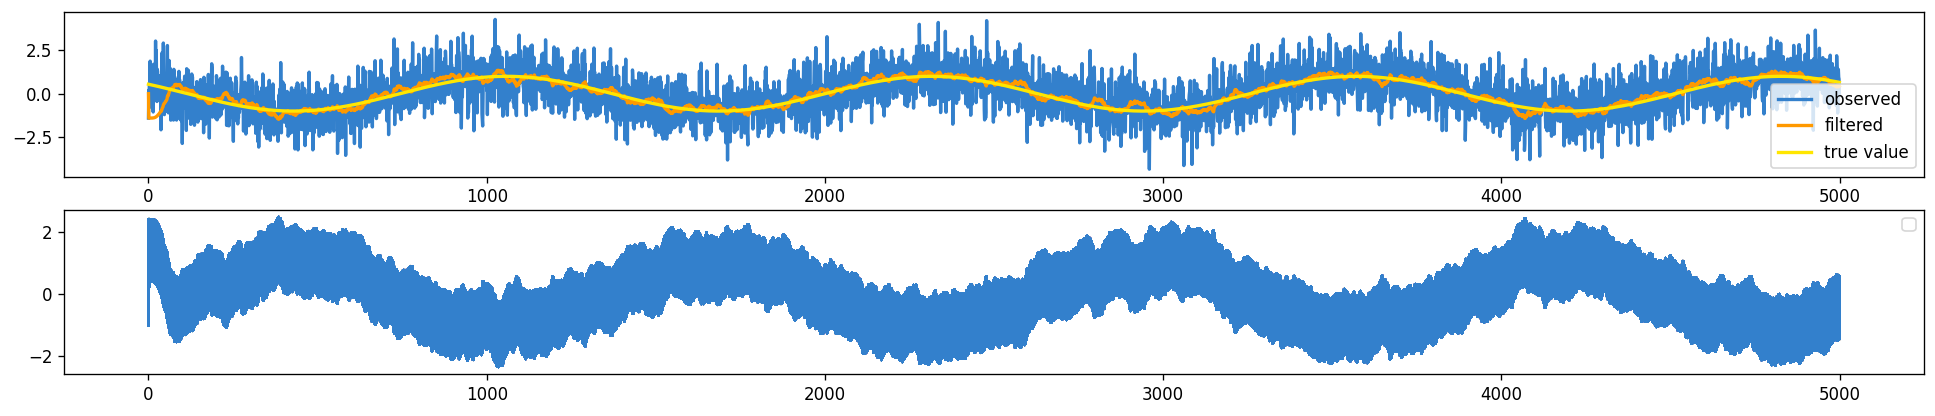

In [46]:
Q = 10**(-6)
TestKalmanFilter(Q)